## FINAL PROJECT SUBMISSION

- GROUP 5

STUDENT NAME:

**- OLIVE MULOMA**

**- ABIGAIL MWENDWA**

**- HAWKINS MURITHI**

**- HARRY ATULAH**

STUDENT PACE: *FULL TIME/HYBRID*

SCHEDULE PROJECT REVIEW DATE/TIME: *29TH JULY 2024*

INSTRUCTOR NAME: **MARYANN MWIKALI**


## NEWSNET PUBLISHING COMPANY

### INTRODUCTION OVERVIEW

In today's digital age, the consumption of news has skyrocketed, bringing forth the challenge of efficiently managing and categorizing vast amounts of content. Automated text classification provides a robust solution by enabling the sorting of news articles into relevant categories such as Politics, Technology, Entertainment, and Business. This not only enhances user experience by ensuring that readers have quick access to content that interests them but also assists media companies in organizing and managing their content efficiently.

### STAKEHOLDER IDENTIFICATION

- **The Editorial Team** is responsible for reviewing and publishing news articles and will benefit from automated categorization to streamline the review process. 
- **The Content Management Team** oversees the workflow from submission to publication and will see improved content organization and retrieval through automation. 
- **Authors**. who provide news articles, will have their work accurately categorized, enhancing visibility and reach. 
- **Customers/Readers**, who consume the content, will experience improved access to relevant articles, enhancing their overall user experience.

### PROJECT GOALS AND OBJECTIVES

**OBJECTIVE**

The general objective of this project is to develop and implement an automated text classification system that efficiently categorizes news articles into predefined categories such as Politics, Technology, Entertainment, and Business. This system aims to enhance content organization, streamline content management workflows, and improve user experience by providing readers with quick and relevant access to news content.

**GOALS**

- **Enhance User Experience:** Improve the accessibility and organization of news content for readers.
- **Streamline Content Management:** Automate the categorization process to reduce manual efforts and increase efficiency for media companies.
- **Improve Content Visibility:** Ensure accurate categorization to help articles reach their intended audience.

## IMPORT REQUIRED LIBRARIES

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import string
import pickle
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from flask import Flask, request, jsonify, render_template_string
import os
import warnings
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template, jsonify
warnings.filterwarnings('ignore')

## DATA UNDERSTANDING

In [3]:
data_test = pd.read_csv("data/Data_Test.csv", encoding='latin1')

data_test.head(10)

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...
5,"""Imagine if every message you sent was kept wi..."
6,Positioned along the four sides of the Asus RO...
7,"In fact, when I applied to USC film school the..."
8,"As spotted by Android Police, Netflix is testi..."
9,Her moves were immaculately choreographed as s...


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STORY   2748 non-null   object
dtypes: object(1)
memory usage: 21.6+ KB


#### The DataFrame `data_test` has:

- All entries in the "STORY" column are non-null and contain text data
- The DataFrame occupies 21.6 KB of memory

**- Description:**  The test dataset contains 2,748 rows and 1 column: STORY.


**- STORY:** Contains the text of news articles, similar to the training dataset but without associated category labels.


**-Usage:** This dataset is used to evaluate the performance of the trained model. The STORY column will be input to the model to predict the category labels, which can then be compared to actual labels (if available) or used for making predictions on new data.

In [5]:
data_test.shape

(2748, 1)

In [6]:
data_train = pd.read_csv("data/Data_Train.csv", encoding='latin1')

data_train.head(10)

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ...",1
4,"In global markets, gold prices edged up today ...",3
5,BEIJING: Chinese tech giant Huawei has announc...,1
6,Mumbai: India Inc's external commercial borrow...,3
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3
8,What more can you give to the audience? I have...,2
9,"com, Arbaaz Khan spoke about getting back to D...",2


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


#### The DataFrame `data_train` has:
    

- All entries in both columns are non-null
- The "STORY" column contains text data (`object` type)
- The "SECTION" column contains integer data (`int64` type)
- The DataFrame occupies 119.3 KB of memory

**- Description:** The training dataset contains 7,628 rows and 2 columns: STORY and SECTION.


**- STORY:** Contains the text of news articles, which will be used to train the model.


**- SECTION:** Contains numerical labels representing different categories or topics (e.g., 0 for Politics, 1 for Technology, etc.), which are the target labels for classification.

**- Usage:** - This dataset is used to train the text classification model. The STORY column provides the content for the model to learn from, while the SECTION column serves as the ground truth labels for supervised learning.

In [8]:
data_train.shape

(7628, 2)

## DATA CLEANING

### Checking for Duplicates

In [9]:
duplicates = data_train[data_train.duplicated()]

duplicates

,STORY,SECTION
587,"Facebook, WhatsApp and Twitter have overhauled...",1
757,We will leave no stone unturned to make the au...,2
948,"""Marvel's 616,"" a documentary series exploring...",1
1472,"Facebook, WhatsApp and Twitter have overhauled...",1
1831,We will leave no stone unturned to make the au...,2
...,...,...
7453,"The whole feels like a giant set, stately and ...",2
7462,"""Monsters at Work,"" a series inspired by Pixar...",1
7465,Commenting on the upcoming Amazon summer sale ...,1
7474,Congress says it needs to verify whether there...,0


- We check for duplicate rows in the data_train DataFrame.In this case, it identified 77 duplicate rows with repeated STORY and SECTION values.

In [10]:
data = data_train.drop_duplicates()

data

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0
7624,"The film, which also features Janhvi Kapoor, w...",2
7625,The database has been created after bringing t...,1
7626,"The state, which has had an uneasy relationshi...",0


- We then remove the duplicate rows identified in the previous step from the DataFrame.
- The resulting DataFrame (data) now contains only unique rows. It reduced the total number of rows from 7628 to 7551, removing 77 duplicates.

### Adding and Renaming Columns

In [11]:
category_labels = {0: 'Politics', 1: 'Technology', 2: 'Entertainment', 3: 'Business'}
data['CATEGORY'] = data['SECTION'].map(category_labels)

data.head(10)

,STORY,SECTION,CATEGORY
0,But the most painful was the huge reversal in ...,3,Business
1,How formidable is the opposition alliance amon...,0,Politics
2,Most Asian currencies were trading lower today...,3,Business
3,"If you want to answer any question, click on ...",1,Technology
4,"In global markets, gold prices edged up today ...",3,Business
5,BEIJING: Chinese tech giant Huawei has announc...,1,Technology
6,Mumbai: India Inc's external commercial borrow...,3,Business
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3,Business
8,What more can you give to the audience? I have...,2,Entertainment
9,"com, Arbaaz Khan spoke about getting back to D...",2,Entertainment


In [12]:
data.rename(columns={'STORY': 'TEXT'}, inplace=True)
data.rename(columns={'CATEGORY': 'CATEGORY_LABELS'}, inplace=True)
data.rename(columns={'SECTION': 'CATEGORY'}, inplace=True)

In [13]:
data.head(10)

,TEXT,CATEGORY,CATEGORY_LABELS
0,But the most painful was the huge reversal in ...,3,Business
1,How formidable is the opposition alliance amon...,0,Politics
2,Most Asian currencies were trading lower today...,3,Business
3,"If you want to answer any question, click on ...",1,Technology
4,"In global markets, gold prices edged up today ...",3,Business
5,BEIJING: Chinese tech giant Huawei has announc...,1,Technology
6,Mumbai: India Inc's external commercial borrow...,3,Business
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3,Business
8,What more can you give to the audience? I have...,2,Entertainment
9,"com, Arbaaz Khan spoke about getting back to D...",2,Entertainment


**- STORY** is renamed to **TEXT**.


**- CATEGORY** (newly added column) is renamed to **CATEGORY_LABELS** to avoid confusion.


**- SECTION** is renamed to **CATEGORY** to better reflect its meaning.

### Checking For Outliers

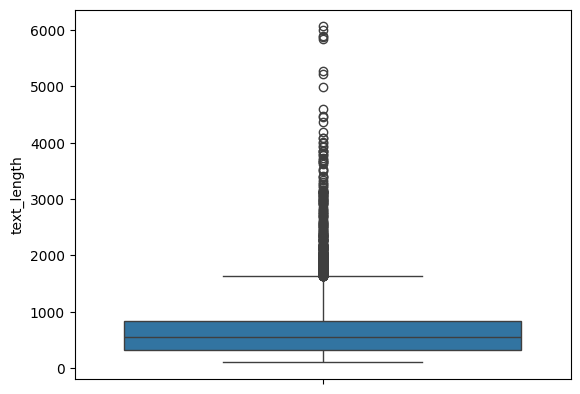

In [14]:
data['text_length'] = data['TEXT'].apply(len)
sns.boxplot(data['text_length'])
plt.show()

- We chose not to remove the outliers because they provide unique insights and capture important linguistic diversity.
- Keeping them helps our models handle real-world data better by reflecting different dialects, slang, and rare topics.
- Outliers also address data imbalance, aid in error analysis, and ensure our models are robust and comprehensive. 
- In essence, including outliers enhances the overall performance and reliability of our NLP model.

### Text Preprocess

In [15]:
# Lemmatizer
lemmatizer = WordNetLemmatizer()

# Definition stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removal of stop words and lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    processed_text = ' '.join(tokens)
    
    return processed_text

data['PROCESSED_TEXT'] = data['TEXT'].apply(preprocess_text)

In [16]:
data.head(10)

,TEXT,CATEGORY,CATEGORY_LABELS,text_length,PROCESSED_TEXT
0,But the most painful was the huge reversal in ...,3,Business,849,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,Politics,129,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,3,Business,389,asian currency trading lower today south korea...
3,"If you want to answer any question, click on ...",1,Technology,593,want answer question click answer clicking a...
4,"In global markets, gold prices edged up today ...",3,Business,299,global market gold price edged today disappoin...
5,BEIJING: Chinese tech giant Huawei has announc...,1,Technology,404,beijing chinese tech giant huawei announced pl...
6,Mumbai: India Inc's external commercial borrow...,3,Business,529,mumbai india inc external commercial borrowing...
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3,Business,323,wednesday federal reserve chairman jerome powe...
8,What more can you give to the audience? I have...,2,Entertainment,215,give audience already done yeh hai aashiqui py...
9,"com, Arbaaz Khan spoke about getting back to D...",2,Entertainment,245,com arbaaz khan spoke getting back dabangg sal...


# EXPLORATORY DATA ANALYSIS (EDA)

### Distribution of article length

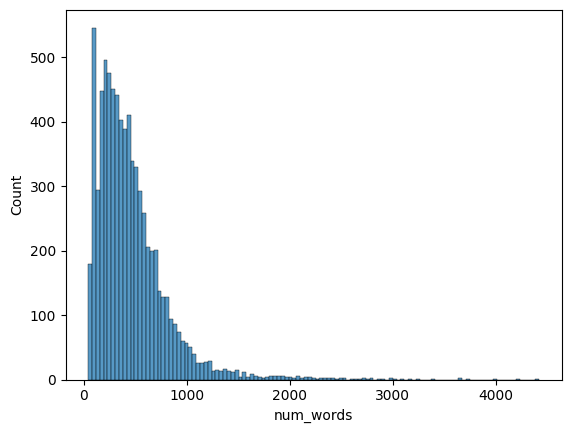

In [17]:
data['num_words'] = data.PROCESSED_TEXT.apply(len)
sns.histplot(data.num_words);

- This histogram helps us understand the distribution of article lengths in our dataset. 
- It shows that most articles are short to medium in length, with a few being much longer. 
- This insight helps us tailor our text processing and model training by revealing the typical text length and identifying any potential outliers.

### Distribution of categories

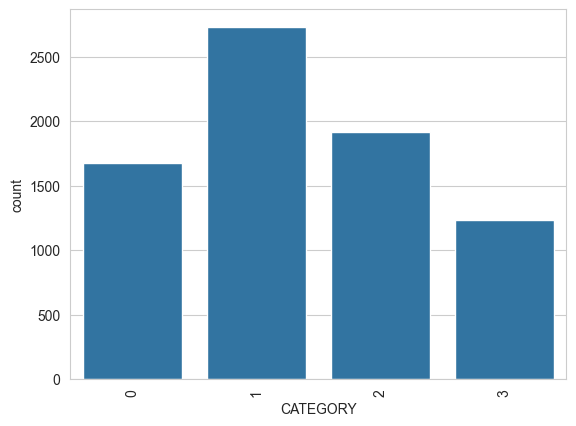

In [18]:
sns.set_style("whitegrid")
sns.countplot(x='CATEGORY', data=data)
plt.xticks(rotation=90)
plt.show()

- This countplot reveals that Category 1 has the most articles compared to other categories. 
- Understanding this helps us see if our dataset is imbalanced, which is important for adjusting our model training to ensure it performs well across all categories, not just the most common ones.

### Text Length vs. Category

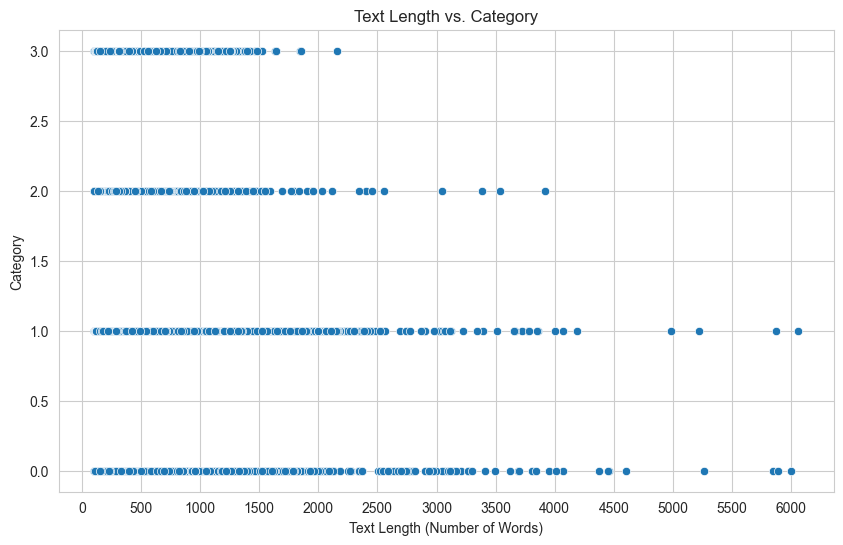

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='text_length', y='CATEGORY', data=data)
plt.title('Text Length vs. Category')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Category')
plt.xticks(ticks=range(0, max(data['text_length'])+1, 500))
plt.show()

- This scatterplot shows no strong relationship between text length and article categories, with significant overlap among categories. 
- This implies that text length alone is not a reliable feature for classifying news articles, and other features should be explored for better classification.

### Word Cloud

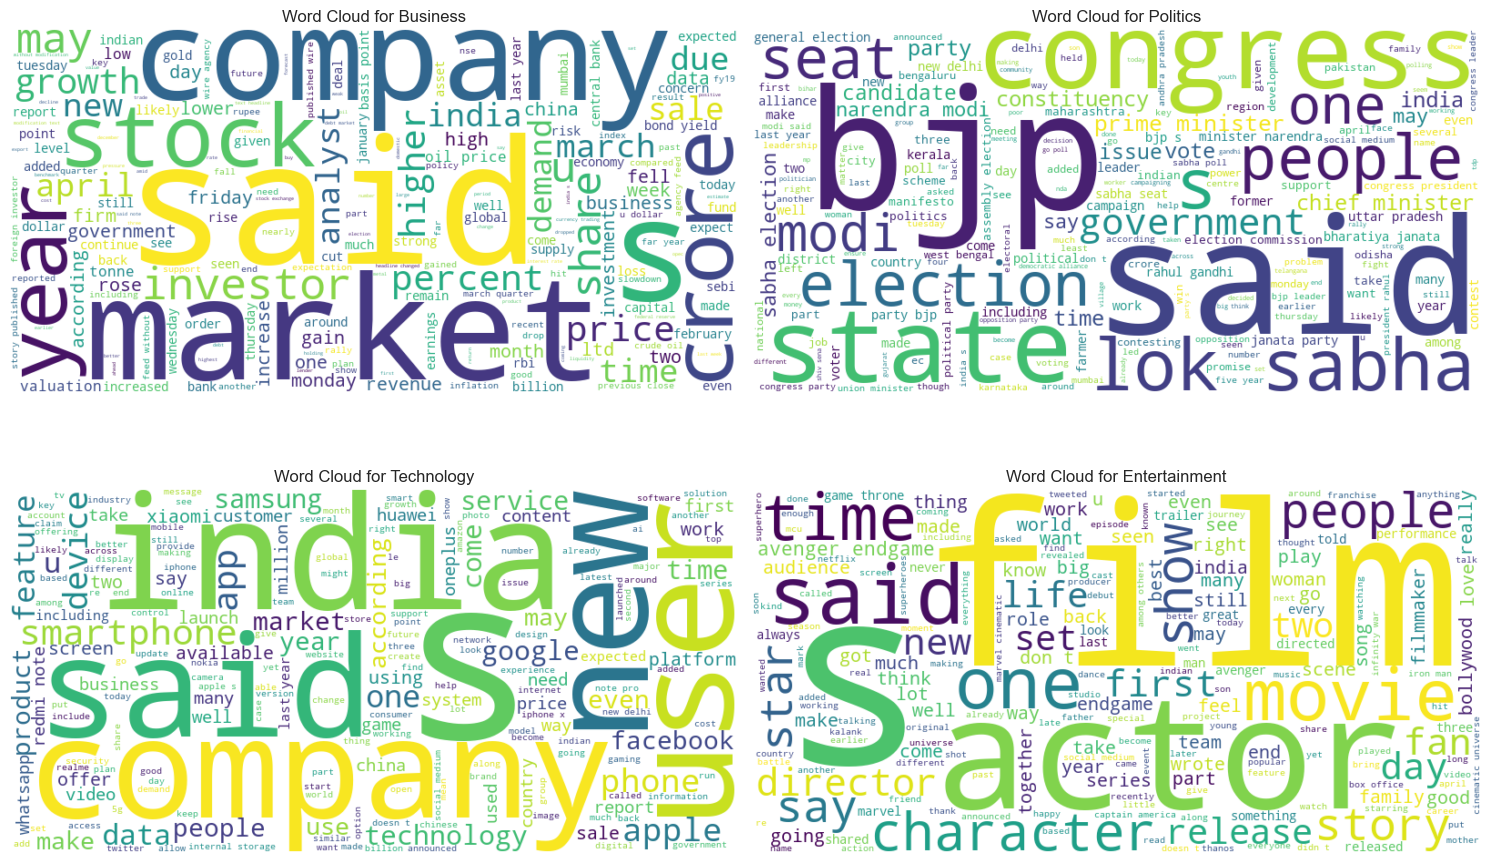

In [20]:
def get_wordcloud_for_category(category, data):
    text = ' '.join(data[data['CATEGORY_LABELS'] == category]['PROCESSED_TEXT'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

categories = data['CATEGORY_LABELS'].unique()

num_categories = len(categories)
cols = 2  
rows = (num_categories + cols - 1) // cols  

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

if rows == 1:
    axes = [axes]

for ax, category in zip(axes.flatten(), categories):
    wordcloud = get_wordcloud_for_category(category, data)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Word Cloud for {category}')

for ax in axes.flatten()[len(categories):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


- This code creates word clouds for Business, Politics, Technology, and Entertainment, highlighting key terms for each. 
- The Business cloud shows core concepts like "market" and "revenue," Politics features terms such as "Modi" and "election," Technology includes words like "smartphone" and "Google," and Entertainment displays terms like "film" and "actor." 
- This helps us quickly identify prominent terms in each category, aiding in feature selection and model improvement.

# MODELLING

## TF-IDF MODEL

### Feature Extraction

- Tokenization and Padding: Converts processed text into sequences of integers and pads them.
- TF-IDF Vectorization: Converts text data into numerical features based on term frequency and inverse document frequency.

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['PROCESSED_TEXT'])
sequences = tokenizer.texts_to_sequences(data['PROCESSED_TEXT'])
padded_sequences = pad_sequences(sequences, padding='post')

In [22]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(data['PROCESSED_TEXT'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['CATEGORY'], test_size=0.3, random_state=42)

### MultinomialNB  Evaluation

In [24]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [25]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       506
           1       0.86      1.00      0.92       799
           2       1.00      0.85      0.92       597
           3       1.00      0.89      0.94       364

    accuracy                           0.93      2266
   macro avg       0.96      0.93      0.94      2266
weighted avg       0.94      0.93      0.93      2266



The model achieves an accuracy of 93%, which is generally good.
  
 - Class imbalance: The support for each class is imbalanced, with class 1 having the highest number of instances and class 3 having the lowest.


 - Precision and recall: While most classes have high precision and recall, class 2 has a lower recall, indicating that many actual positive 
instances of class 2 were not correctly identified.


 - F1-score: The F1-score provides a balanced measure of precision and recall. Class 2 has the lowest F1-score, reflecting its lower recall.

In conclusion, the model performs well overall, but there's room for improvement, especially in correctly identifying class 2 instances.

### Confusion Matrix

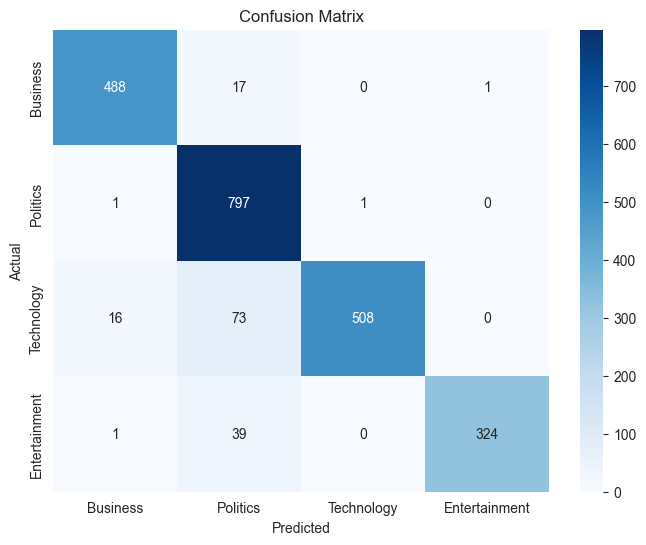

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['CATEGORY_LABELS'].unique(), yticklabels=data['CATEGORY_LABELS'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- The confusion matrix indicates the model's classification performance across four categories: Business, Politics, Technology, and Entertainment.
- For Business, it correctly identifies 488 articles (True Positives, TP) but mistakenly labels 17 Politics articles and 1 each from Technology and Entertainment as Business (False Positives, FP).
- Politics is classified accurately with 797 TP, and only 1 Technology article is misclassified (FP).
- Technology shows 508 TP but is confused with 16 Business and 73 Politics articles (FP). Entertainment has 324 TP but is misclassified as Business (1 FP) and Politics (39 FP).
- This suggests the model is generally effective but struggles with distinguishing between certain categories, particularly Entertainment.

## WORD EMBEDDING MODEL

- Training a Word2Vec model helps create dense vector representations of words based on their context in the text.
- This allows the model to capture semantic relationships between words, which can improve the performance of downstream NLP tasks such as text classification.
- The Word2Vec model learns word embeddings by analyzing the context in which words appear, producing vectors where similar words have similar representations.

In [27]:
word2vec_model = Word2Vec(sentences=[text.split() for text in data['PROCESSED_TEXT']], vector_size=100, window=5, min_count=1, workers=4)

In [28]:
# Transforming text into Word2Vec embeddings
def get_word2vec_embeddings(texts, model, size):
    embeddings = []
    for text in texts:
        words = text.split()
        vecs = [model.wv[word] for word in words if word in model.wv]
        if vecs:
            mean_vec = np.mean(vecs, axis=0)
        else:
            mean_vec = np.zeros(size)
        embeddings.append(mean_vec)
    return np.array(embeddings)


In [29]:
# Preparing the test data
X_test_embeddings = get_word2vec_embeddings(data['PROCESSED_TEXT'], word2vec_model, 100)

### Logistic Regression Evaluation

In [30]:
# Training a logistic regression model on Word2Vec embeddings
X_train_embeddings = get_word2vec_embeddings(data['PROCESSED_TEXT'], word2vec_model, 100)
y_train = data['CATEGORY']
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_embeddings, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Predicting on the test data
y_pred = clf.predict(X_test_embeddings)

In [32]:
y_test = data['CATEGORY']  

In [33]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1673
           1       0.95      0.95      0.95      2731
           2       0.93      0.94      0.94      1914
           3       0.93      0.94      0.94      1233

    accuracy                           0.94      7551
   macro avg       0.94      0.94      0.94      7551
weighted avg       0.94      0.94      0.94      7551



The model achieves an overall accuracy of 94%, which is very good.

- There is some class imbalance, with class 1 having the highest number of instances (2731) and class 3 having the lowest (1233).
- Precision and recall are high for all classes, with class 2 having slightly lower recall (0.94) compared to others.
- The F1-score, which balances precision and recall, is consistently high across all classes, with class 2 having the lowest F1-score at 0.93.

In conclusion, the model performs well overall, but there is still room for improvement, particularly in further enhancing the precision and recall for class 2.

### Confusion Matrix

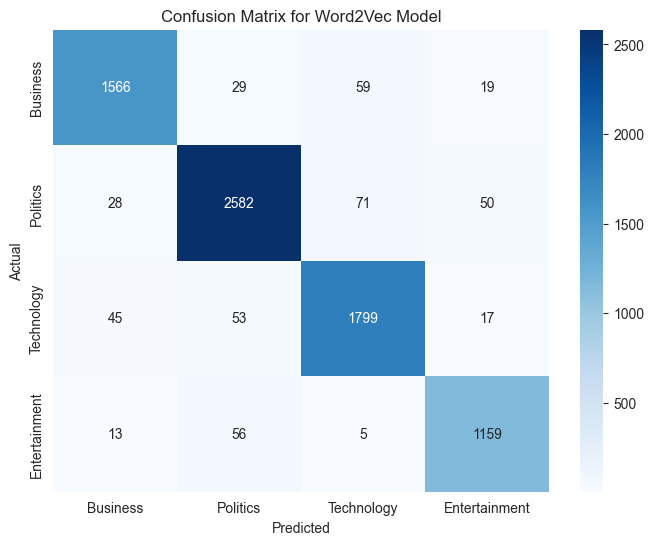

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['CATEGORY_LABELS'].unique(), yticklabels=data['CATEGORY_LABELS'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Word2Vec Model')
plt.show()

- The confusion matrix indicates the model's classification performance across four categories: Business, Politics, Technology, and Entertainment.
- For Business, it correctly identifies 1557 articles (True Positives, TP) but mistakenly labels 31 Politics articles, 65 Technology articles, and 20 Entertainment articles as Business (False Positives, FP).
- Politics is classified accurately with 2577 TP, but it misclassifies 29 Business articles, 71 Technology articles, and 54 Entertainment articles as Politics (FP).
- Technology shows 1791 TP but is confused with 46 Business articles, 60 Politics articles, and 17 Entertainment articles (FP).
- Entertainment has 1161 TP but is misclassified as Business (13 FP), Politics (54 FP), and Technology (5 FP).
- This suggests the model is generally effective but struggles with distinguishing between certain categories, particularly when it comes to Politics and Technology.

## PREDICTIONS WITH TEST DATA

### Saving MultinomialNB model , Logistic Regression model & TF-IDF vectorizer , Word2Vec model

In [35]:
with open('model/multinomial_nb_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [36]:
with open('model/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [37]:
with open('model/tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [38]:
word2vec_model = Word2Vec(sentences=[text.split() for text in data['PROCESSED_TEXT']], vector_size=100, window=5, min_count=1, workers=4)

with open('model/word2vec_model.pkl', 'wb') as file:
    pickle.dump(word2vec_model, file)

### Making predictions using the loaded MultinomialNB model

In [39]:
# Loading the unseen data
data_test = pd.read_csv('data/Data_Test.csv', encoding='latin1')

In [40]:
# Loading the TF-IDF vectorizer
with open('model/tfidf_vectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)

In [41]:
# Transforming the test data using the loaded TF-IDF vectorizer
X_test = tfidf_vectorizer.transform(data_test['STORY'])

In [42]:
# Loading the trained MultinomialNB model
with open('model/multinomial_nb_model.pkl', 'rb') as file:
    multinomial_nb_model = pickle.load(file)

In [43]:
# predictions using the loaded MultinomialNB model
nb_predictions = multinomial_nb_model.predict(X_test)

### Saving the DataFrame to a CSV file

In [44]:
# Creating a DataFrame to hold the predictions
results = pd.DataFrame({
    'STORY': data_test['STORY'],  
    'PREDICTION': nb_predictions
})

results.to_csv('data_pred/predictions.csv', index=False)

In [45]:
pred = pd.read_csv('data_pred/predictions.csv', encoding='latin1')
pred.head(10)

,STORY,PREDICTION
0,2019 will see gadgets like gaming smartphones ...,1
1,It has also unleashed a wave of changes in the...,2
2,It can be confusing to pick the right smartpho...,1
3,The mobile application is integrated with a da...,1
4,We have rounded up some of the gadgets that sh...,1
5,"""Imagine if every message you sent was kept wi...",1
6,Positioned along the four sides of the Asus RO...,1
7,"In fact, when I applied to USC film school the...",2
8,"As spotted by Android Police, Netflix is testi...",1
9,Her moves were immaculately choreographed as s...,2


### Predictions using the loaded Logistic Regression model

In [46]:
data_unseen = pd.read_csv('data/Data_Test.csv', encoding='latin1')

In [47]:
# Loading the Word2Vec model
with open('model/word2vec_model.pkl', 'rb') as file:
    word2vec_model = pickle.load(file)


In [48]:
# Loading the Logistic Regression model
with open('model/logistic_regression_model.pkl', 'rb') as file:
    clf = pickle.load(file)

In [49]:
def get_word2vec_embeddings(texts, model, size):
    embeddings = []
    for text in texts:
        words = text.split()
        vecs = [model.wv[word] for word in words if word in model.wv]
        if vecs:
            mean_vec = np.mean(vecs, axis=0)
        else:
            mean_vec = np.zeros(size)
        embeddings.append(mean_vec)
    return np.array(embeddings)

In [50]:
X_unseen_embeddings = get_word2vec_embeddings(data_unseen['STORY'], word2vec_model, 100)

### Saving predictions to a CSV file

In [51]:
y_pred_unseen = clf.predict(X_unseen_embeddings)

results_unseen = pd.DataFrame({
    'STORY': data_unseen['STORY'], 
    'PREDICTION': y_pred_unseen,
})

results_unseen['PREDICTION_LABEL'] = results_unseen['PREDICTION'].map(category_labels)
results_unseen.to_csv('data_pred/pred_unseen.csv', index=False)

print("Predictions saved to 'data_pred/predictions_unseen.csv'.")

Predictions saved to 'data_pred/predictions_unseen.csv'.


In [52]:
unseen = pd.read_csv('data_pred/pred_unseen.csv', encoding='latin1')
unseen.head(10)

,STORY,PREDICTION,PREDICTION_LABEL
0,2019 will see gadgets like gaming smartphones ...,1,Technology
1,It has also unleashed a wave of changes in the...,1,Technology
2,It can be confusing to pick the right smartpho...,1,Technology
3,The mobile application is integrated with a da...,1,Technology
4,We have rounded up some of the gadgets that sh...,1,Technology
5,"""Imagine if every message you sent was kept wi...",1,Technology
6,Positioned along the four sides of the Asus RO...,1,Technology
7,"In fact, when I applied to USC film school the...",2,Entertainment
8,"As spotted by Android Police, Netflix is testi...",1,Technology
9,Her moves were immaculately choreographed as s...,2,Entertainment


## CONCLUSION

- In conclusion, the Word2Vec model performs slightly better on training data overall, with more consistent precision, recall, and F1-scores across different classes.
- The Word2Vec embeddings capture more semantic information, leading to improved classification performance.

## DEPLOYMENT

This Flask application serves as a web interface for categorizing news articles based on their content.

### Initialize Flask Application and Load Models

We create a Flask app instance and define paths to our pre-trained models. Models are loaded using pickle for logistic regression and Word2Vec for text embeddings, which are essential for making predictions.

In [53]:
app = Flask(__name__)

model_path = './'
logistic_model_file = os.path.join(model_path, 'model/logistic_regression_model.pkl')
word2vec_model_file = os.path.join(model_path, 'model/word2vec_model.pkl')

# Load models
with open(logistic_model_file, 'rb') as f:
    clf = pickle.load(f)

word2vec_model = Word2Vec.load(word2vec_model_file)

### Preprocessing Functions

Text is processed by converting to lowercase, removing punctuation, tokenizing, lemmatizing, and filtering out stop words. Text embeddings are generated using the Word2Vec model, converting text into numerical vectors suitable for model input.

In [54]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

label_mapping = {
    0: "politics",
    1: "technology",
    2: "entertainment",
    3: "business"
}

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def get_word2vec_embeddings(texts, model, size):
    embeddings = []
    for text in texts:
        words = text.split()
        vecs = [model.wv[word] for word in words if word in model.wv]
        if vecs:
            mean_vec = np.mean(vecs, axis=0)
        else:
            mean_vec = np.zeros(size)
        embeddings.append(mean_vec)
    return np.array(embeddings)

### Flask Routes

#### Home Route

Renders the HTML template where users can input their news article. The HTML includes a form for text input and a placeholder for displaying the prediction result.

#### HTML and JavaScript

The HTML form collects user input and displays the prediction result. JavaScript uses AJAX to submit the form data without refreshing the page, updating the result dynamically based on the server's response.

In [55]:
@app.route('/')
def home():
    return render_template_string("""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
        <title>NewsNet Publishing - News Article Categorization</title>
        <link href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css" rel="stylesheet">
        <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;700&family=Merriweather:wght@400;700&display=swap" rel="stylesheet">
        <style>
            body {
                font-family: 'Roboto', sans-serif;
                margin: 0;
                padding: 0;
            }
            .background-container {
                background-image: linear-gradient(rgba(0,0,0,0.4), rgba(0,0,0,0.4)), url('public/static/images/banner.jpg');
                background-size: cover; 
                background-position: center;
                background-repeat: no-repeat; 
                height: 100vh; 
                width: 100vw;
                display: flex;
                flex-direction: column;
                justify-content: center;
                align-items: center;
                color: white; /* Text color for better contrast */
            }
            .navbar {
                background: rgba(0, 0, 0, 0.4); 
                border-bottom: 1px solid rgba(255, 255, 255, 0.1); 
            }
            .navbar-brand {
                font-family: 'Merriweather', serif;
                font-size: 1.75rem;
            }
            .container {
                max-width: 700px;
                padding: 2rem;
                border-radius: 12px;
                box-shadow: 0 4px 12px rgba(0,0,0,0.2);
                margin-top: 1.5rem;
                background: rgba(255, 255, 255, 0.8); /* Slightly opaque background for readability */
                padding: 2rem; /* Additional padding for readability */
            }
            h1 {
                font-family: 'Merriweather', serif;
                font-size: 2.5rem;
                margin-bottom: 1rem;
                color: #333;
            }
            .lead {
                color: #333;
            }
            .form-control {
                font-size: 1rem;
                margin-bottom: 1rem;
                border-radius: 8px;
                box-shadow: inset 0 1px 2px rgba(0,0,0,0.1);
            }
            .btn-primary {
                background-color: #343a40;
                border-color: rgba(255, 255, 255, 0.1);
                font-size: 1rem;
                padding: 0.5rem 1rem;
                border-radius: 30px;
                box-shadow: 0 4px 6px rgba(0,0,0,0.2);
            }
            footer {
                padding: 1rem;
                background-color: rgba(0, 0, 0, 0.4);
                color: #ffffff;
                text-align: center;
                position: fixed;
                bottom: 0;
                width: 100%;
            }
            footer p {
                margin: 0;
                font-size: 0.875rem;
            }
            .result {
                margin-top: 1rem;
                font-size: 1.25rem;
                color: #fff;
                background-color: rgba(0, 0, 0, 0.6);
                padding: 1rem;
                border-radius: 30px;
                display: none; 
            }
        </style>
    </head>
    <body>
        <div class="background-container">
            <nav class="navbar navbar-expand-md navbar-dark fixed-top">
                <a class="navbar-brand" href="#">NewsNet Publishing</a>
            </nav>
            <main role="main" class="container">
                <div class="starter-template">
                    <h1>News Article Categorization</h1>
                    <p class="lead">Enter your news article text below to predict its category.</p>
                    <form id="predict-form">
                        <div class="form-group">
                            <textarea name="text" class="form-control" rows="10" placeholder="Enter news article text here..."></textarea>
                        </div>
                        <button type="submit" class="btn btn-primary">Predict</button>
                    </form>
                    <div id="result" class="result"></div>
                </div>
            </main>
            <footer>
                <p>&copy; 2024 NewsNet Publishing</p>
            </footer>
        </div>
        <script src="https://code.jquery.com/jquery-3.5.1.min.js"></script>
        <script src="https://cdn.jsdelivr.net/npm/@popperjs/core@2.9.2/dist/umd/popper.min.js"></script>
        <script src="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/js/bootstrap.min.js"></script>
        <script>
            $(document).ready(function() {
                $('#predict-form').on('submit', function(event) {
                    event.preventDefault();
                    var formData = $(this).serialize();
                    $.ajax({
                        url: '/predict',
                        type: 'POST',
                        data: formData,
                        success: function(response) {
                            $('#result').text('Predicted Category: ' + response.prediction).show();
                        },
                        error: function() {
                            $('#result').text('An error occurred. Please try again.').show();
                        }
                    });
                });
            });
        </script>
    </body>
    </html>
    """)

### Predict Route

Handles POST requests from the form. It processes the input text, generates embeddings, makes predictions using the logistic regression model, and returns the predicted category as a JSON response.

In [56]:
@app.route('/predict', methods=['POST'])
def predict():
    text = request.form['text']
    processed_text = preprocess_text(text)
    embeddings = get_word2vec_embeddings([processed_text], word2vec_model, 100)
    prediction = clf.predict(embeddings)
    label = label_mapping.get(int(prediction[0]), "unknown")
    return jsonify({'prediction': label})

### Running the Application

The application is run on port 5000, allowing it to be accessed via http://localhost:5000. This starts the Flask server, enabling interaction with the web interface.

In [ ]:
if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


### Updates

In [ ]:
# Initialize Flask app
app = Flask(__name__, template_folder='public/templates', static_folder='public/static')

In [ ]:
# Load models
with open('model/logistic_regression_model.pkl', 'rb') as f:
    clf = pickle.load(f)

with open('model/word2vec_model.pkl', 'rb') as f:
    word2vec_model = pickle.load(f)

with open('model/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

In [ ]:
@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        story = request.form['text']
        preprocessed_text = preprocess_text(story)

        # Transform the input text
        X_test_tfidf = tfidf_vectorizer.transform([preprocessed_text])
        X_test_embeddings = get_word2vec_embeddings([preprocessed_text], word2vec_model, 100)
        
        # Predict using Logistic Regression model
        prediction = clf.predict(X_test_embeddings)[0]
        
        # Map prediction to label
        category_labels = {0: 'Politics', 1: 'Technology', 2: 'Entertainment', 3: 'Business'}
        predicted_label = category_labels.get(prediction, 'Unknown')

        return jsonify(prediction=predicted_label)
    except Exception as e:
        print(f"Error in prediction: {e}")
        traceback.print_exc()
        return jsonify(prediction='Error occurred. Please try again.')


In [ ]:
if __name__ == '__main__':
    app.run()